<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


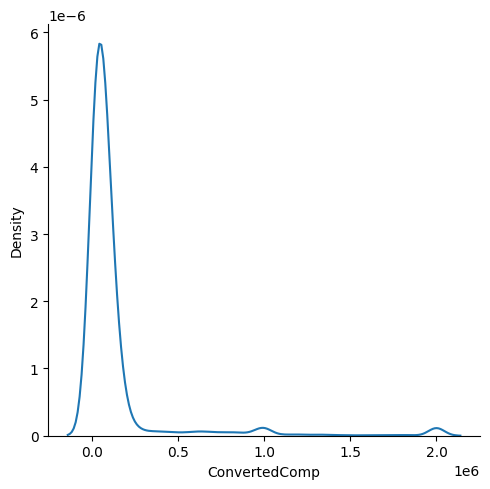

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df['ConvertedComp'], kind="kde")
plt.show()


Plot the histogram for the column `ConvertedComp`.


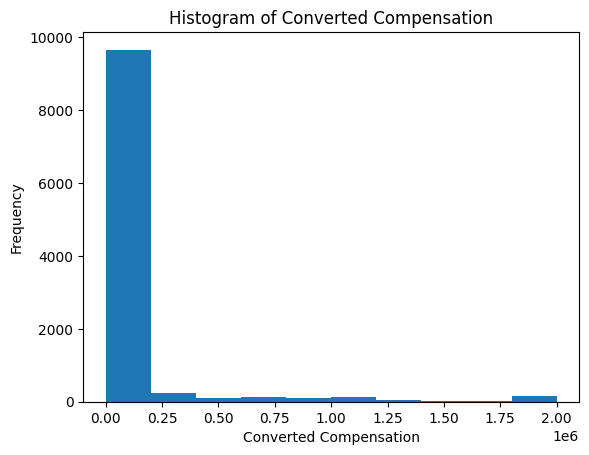

In [4]:
plt.hist(df['ConvertedComp'])
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')
plt.show()


What is the median of the column `ConvertedComp`?


In [5]:
median_convertedcomp = df['ConvertedComp'].median()
print(median_convertedcomp)


57745.0


How many responders identified themselves only as a **Man**?


In [6]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)


Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
median_female_comp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(median_female_comp)

57708.0


Give the five number summary for the column `Age`?


** *texto en cursiva*Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
age_summary = df['Age'].describe()
print(age_summary)


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


In [15]:
min_age = df['Age'].min()
q1_age = df['Age'].quantile(0.25)
median_age = df['Age'].median()
q3_age = df['Age'].quantile(0.75)
max_age = df['Age'].max()
print("min_age:", min_age,
      "q1_age:", q1_age,
      "median_age:", median_age,
      "q3_age:", q3_age,
      "max_age:", max_age)


min_age: 16.0 q1_age: 25.0 median_age: 29.0 q3_age: 35.0 max_age: 99.0


Plot a histogram of the column `Age`.


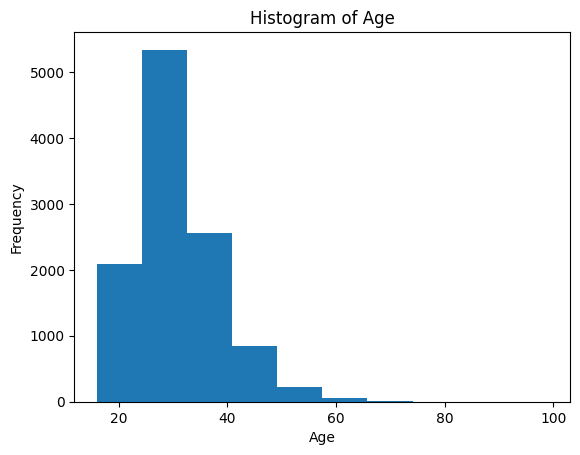

In [16]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


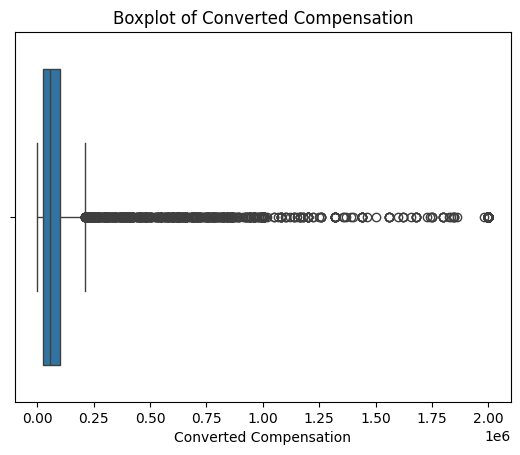

In [19]:
sns.boxplot(x=df['ConvertedComp'])
plt.xlabel('Converted Compensation')
plt.title('Boxplot of Converted Compensation')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [20]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)


Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [21]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [22]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]

print("Número de valores atípicos:", num_outliers)


Número de valores atípicos: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [23]:
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print("Forma del DataFrame original:", df.shape)
print("Forma del DataFrame sin valores atípicos:", df_no_outliers.shape)


Forma del DataFrame original: (11398, 85)
Forma del DataFrame sin valores atípicos: (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [26]:
for col in ['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs']:
    correlation = df_no_outliers['Age'].corr(df_no_outliers[col])
    print(f"Correlación entre Age y {col}: {correlation}")

Correlación entre Age y Respondent: 0.0021801779110118477
Correlación entre Age y CompTotal: 0.006336555779827538
Correlación entre Age y ConvertedComp: 0.4018213997122177
Correlación entre Age y WorkWeekHrs: 0.03203181590498933
Correlación entre Age y CodeRevHrs: -0.012877695845513695


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
